<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/Deep_Learning_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/
#Neural Network (NN)
- **Computational models** that **mimic** the complex functions of the **human brain**
- Consists of neurons to process and learn from data
- Pattern recognition and decision making in ML
- NN extract identifying features from data, lacking pre-programmed understanding

####Evolution of NN

- 1940s-1950s: Early Concepts
- 1960s-1970s: Perceptrons
- 1980s: Backpropagation and Connectionism
- 1990s: Boom (pattern recognition) and winter (computational costs)
- 2000s: Resurgence and Deep Learning (larger dataset)
- 2010s-Present: DL Dominance

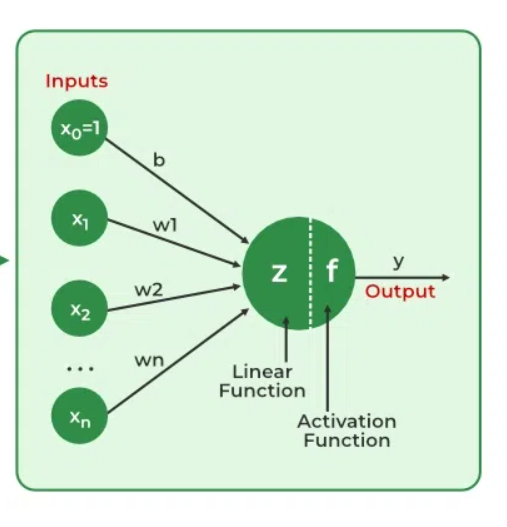

####Forward Propagation:
- Input Layer: Each feature is a node receiving input data.
- Weights and Connections: Weights define the strength of connections and are adjusted during training.
- Hidden Layers: Neurons process inputs by applying weights and activation functions to introduce non-linearity for pattern recognition.
- Output Layer: The final result is produced by propagating through the network.

####Backpropagation:
- Loss Calculation: The output is compared to the target, and the loss (e.g., Mean Squared Error) is calculated.
- Gradient Descent: The network adjusts weights to minimize the loss by computing the gradient.
- Training: This process is repeated iteratively to adapt and learn patterns from the data.
- Activation Functions: Functions like ReLU or sigmoid introduce non-linearity to model complex patterns.


####Types of Neural Networks (supervised learning)
- **Feedforward Neural Network (FNN)**: NN in singal direction architecture, feedback loops are absent. Applications such as regression and pattern recognition
- **Multi-layer Perceptron (MLP)**: A type of feedforward neural network with an input layer, one or more hidden layers, and an output layer, using nonlinear activation functions. Application such as regression problem, binary/ multi-class problem
- **Convolutional Neural Network (CNN)**: A neural network designed for image processing, using convolutional layers to learn features for tasks like image recognition and object detection.
- **Recurrent Neural Network (RNN)**: A neural network designed for sequential data, utilizing feedback loops to handle dependencies in tasks like time series prediction and natural language processing.
- **Long Short-Term Memory (LSTM)**: A variant of RNN that addresses the vanishing gradient problem, using memory cells and gates to manage long-term information. LSTM has three gates (input, forget, and output gates) and uses memory cells to store information over long periods.
- **Gated Recurrent Unit (GRU):** A simple variant of RNN. GRU: Has two gates (reset and update gates) and combines the memory cell and hidden state, making it simpler and faster to train than LSTM.

In [1]:
import numpy as np

# array of any amount of numbers. n = m
X = np.array([[1, 2, 3],
			[3, 4, 1],
			[2, 5, 3]])

# multiplication
y = np.array([[.5, .3, .2]])

# transpose of y
y = y.T

# sigma value
sigm = 2

# find the delta
delt = np.random.random((3, 3)) - 1

for j in range(100):

	# find matrix 1. 100 layers.
	m1 = (y - (1/(1 + np.exp(-(np.dot((1/(1 + np.exp(
		-(np.dot(X, sigm))))), delt))))))*((1/(
			1 + np.exp(-(np.dot((1/(1 + np.exp(
				-(np.dot(X, sigm))))), delt)))))*(1-(1/(
					1 + np.exp(-(np.dot((1/(1 + np.exp(
						-(np.dot(X, sigm))))), delt)))))))

	# find matrix 2
	m2 = m1.dot(delt.T) * ((1/(1 + np.exp(-(np.dot(X, sigm)))))
						* (1-(1/(1 + np.exp(-(np.dot(X, sigm)))))))
	# find delta
	delt = delt + (1/(1 + np.exp(-(np.dot(X, sigm))))).T.dot(m1)

	# find sigma
	sigm = sigm + (X.T.dot(m2))

# print output from the matrix
print(1/(1 + np.exp(-(np.dot(X, sigm)))))


[[0.99999326 0.99999376 0.99999362]
 [0.99999988 0.99999989 0.99999988]
 [1.         1.         1.        ]]


#**i) Feedforward Neural Network (FNN)**:

- NN in single-direction architecture, feedback loops are absent. Applications such as regression and pattern recognition
- FNN, a type of NN, doesn't have a cycle. It consists of an input layer, one/ more hidden layers, and one output layers

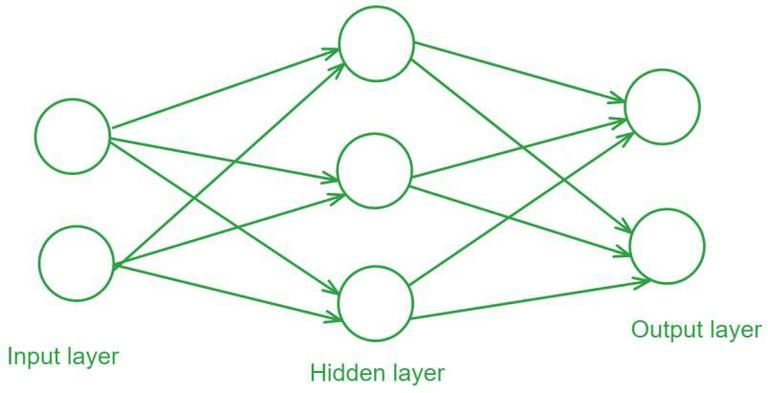




####**Training a Feedforward Neural Network:**

Training adjusts neuron weights to minimize error between predicted and actual output using backpropagation and gradient descent.

- **Forward Propagation**: Input data passes through the network to calculate the output
- **Loss Calculation**: Error is calculated using a loss function like Mean Squared Error or Cross-Entropy Loss
- **Backpropagation**: Error is propagated back to update weights using gradients, and weights are adjusted with gradient descent

####**Gradient Descent**
An optimization algorithm that updates weights by moving in the direction of the negative gradient to minimize the loss function. Variants include:

- **Batch Gradient Descent:** Updates weights using the entire dataset.
- **Stochastic Gradient Descent (SGD):** Updates weights for each training example.
- **Mini-batch Gradient Descent:** Updates weights using small batches of data.

####**Evaluation Metrics:**

- **Accuracy:** Proportion of correct predictions.
- **Precision:** True positives over total predicted positives.
- **Recall:** True positives over actual positives.
- **F1 Score:** Balance between precision and recall.
- **Confusion Matrix:** Shows true/false positives and negatives.

In [1]:
#i) Import libraries
import tensorflow as tf  #for supporting FNN
from tensorflow.keras.models import Sequential  #FNN model
from tensorflow.keras.layers import Dense, Flatten  #Adding layers
from tensorflow.keras.optimizers import Adam  #Adam (Adaptive Moment Estimation) is a Gradient descent optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy  #Loss function
from tensorflow.keras.metrics import SparseCategoricalAccuracy  #Metrics

#ii) Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist #dateset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#iii) Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

#iv) Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

#v) Train the model
model.fit(x_train, y_train, epochs=5)

#vi) Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.4359 - sparse_categorical_accuracy: 0.8795
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.1209 - sparse_categorical_accuracy: 0.9644
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0790 - sparse_categorical_accuracy: 0.9758
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0586 - sparse_categorical_accuracy: 0.9823
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0459 - sparse_categorical_accuracy: 0.9852
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0935 - sparse_categorical_accuracy: 0.9713

Test accuracy: 0.9747999906539917


#**ii) Multi-layer Perceptron (MLP)**:

A type (special case) of feedforward neural network with an input layer, one or more hidden layers, and an output layer, using nonlinear activation functions. Application such as regression problem, binary/ multi-class problem

- Every layer is fully connected layer (some definition, no of neurons)


In [4]:
import tensorflow as tf
import numpy as np
minist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = minist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


n=60000
d=784
beta=5000
width = int(np.floor(n**(d/(2*(beta+d)))*(np.log(n)**2)))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    tf.keras.layers.Dense(width, activation='relu'),
    ])

predictions = model(x_train[:1]).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.5865 - loss: 2.1883
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.6761 - loss: 1.8406
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.7727 - loss: 1.3204
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.7884 - loss: 1.1926
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7919 - loss: 1.1732
313/313 - 1s - 4ms/step - accuracy: 0.7848 - loss: 1.2110


[1.2109661102294922, 0.7847999930381775]

In [7]:
# Use dropout in layers for fare comparison

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dense(width, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(width, activation='relu')
])

predictions = model(x_train[:1]).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.7222 - loss: 0.9573
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9601 - loss: 0.1707
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9682 - loss: 0.1360
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9753 - loss: 0.1066
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9766 - loss: 0.1038
313/313 - 1s - 4ms/step - accuracy: 0.9715 - loss: 0.1193


[0.11928500980138779, 0.9714999794960022]

#**iii) Convolutional Neural Network (CNN)**:

Implementation: https://www.geeksforgeeks.org/introduction-convolution-neural-network/


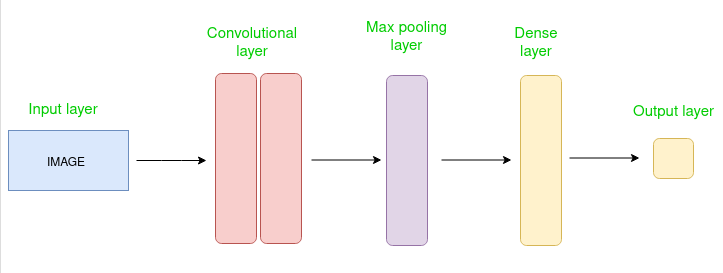

**Advantages**

- Excellent at detecting patterns in images, videos, and audio.
- Robust to translation, rotation, and scaling variations.
- Eliminates the need for manual feature extraction with end-to-end training.
- Can handle large datasets and achieve high accuracy.

**Disadvantages**

- Computationally expensive and memory-intensive to train.
- Prone to overfitting with small datasets or improper regularization.
- Requires large amounts of labeled data.
- Limited interpretability, making it hard to understand what the network has learned.

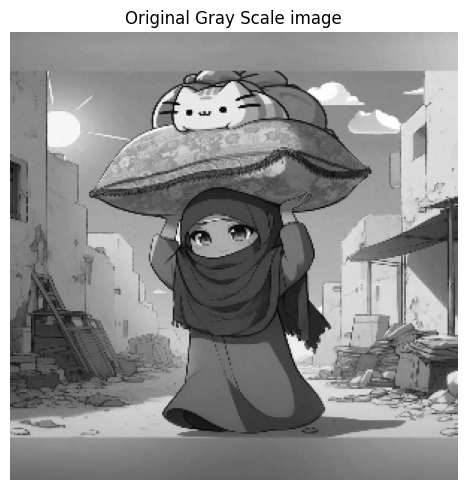

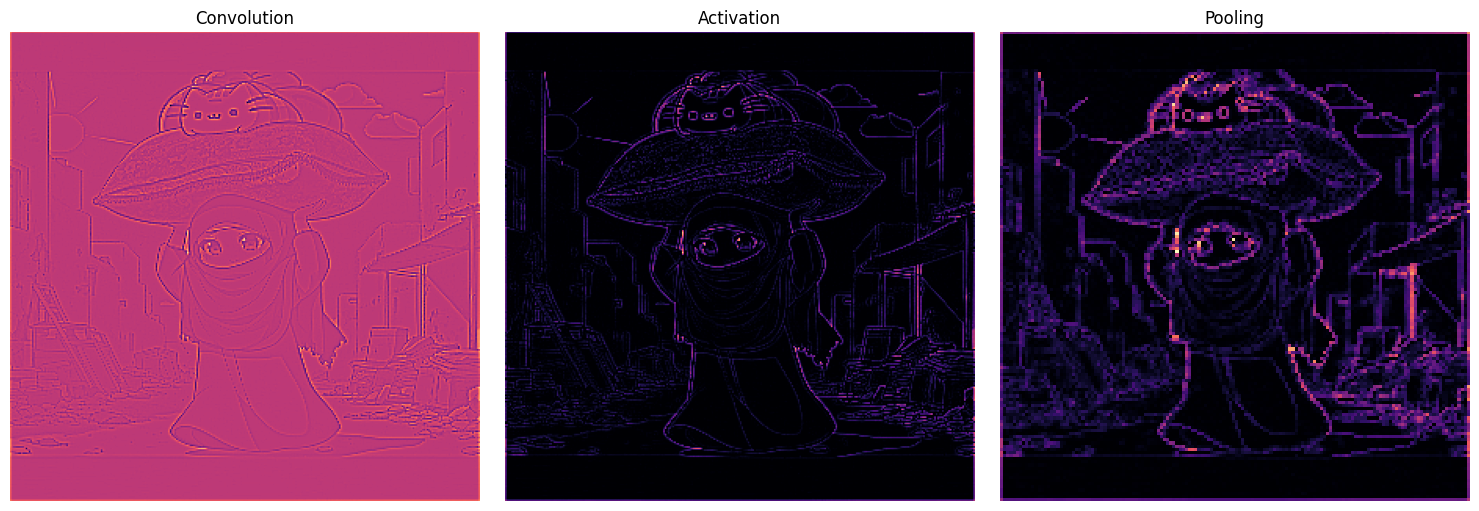

In [3]:
# i) import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# ii) set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# iii) define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

# iv) load the image
image = tf.io.read_file('pic1.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# v) plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# vi) Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# v) convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# vi) Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# vii) Activation layer
relu_fn = tf.nn.relu
# viii) Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# ix) Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

Courtesy: https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/

#**iv) Recurrent Neural Network (RNN)**:

A neural network designed for sequential data, utilizing feedback loops to handle dependencies in tasks like time series prediction and natural language processing.

- Works better than a simple NN when data is sequential like Time-Series data and Text data

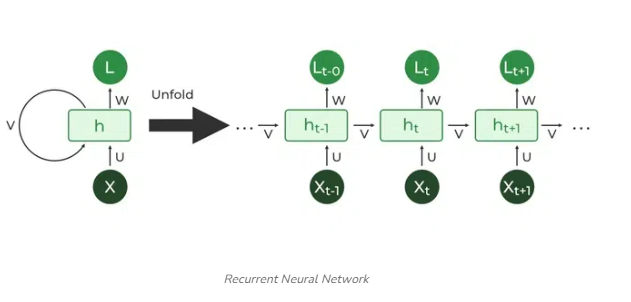

- RNNs have a looping structure while FNNs don't have a looping structure
- Four types of RNNs based on the number of inputs and outputs in the network:(i) One to One (ii) One to Many (iii) Many to One (iv) Many to Many

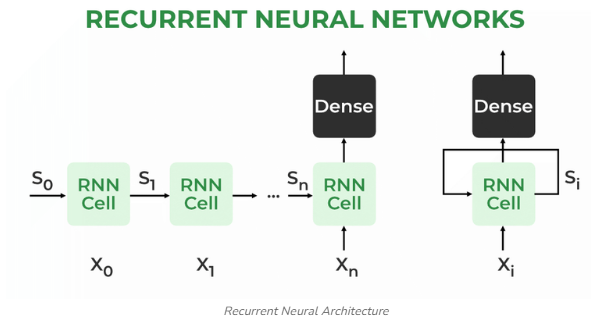


The formula for calculating the current state:

ht=f(ht−1,xt)

where,

ht -> current state
ht-1 -> previous state
xt -> input state
Formula for applying Activation function(tanh)

ht=tanh(Whh ht−1 + Wxh xt)

where,

whh -> weight at recurrent neuron
wxh -> weight at input neuron

The formula for calculating output:
yt=Why ht yt=Why ht
Yt -> output
Why -> weight at output layer

- Backpropagation Through Time (BPTT)

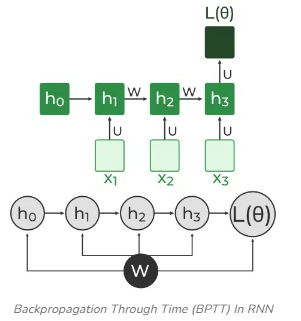


####**Issues with Standard RNNs**

- Vanishing Gradient: RNNs struggle with time-dependent data (e.g., text generation, translation) due to gradient decay during training.
- Exploding Gradient: When gradients grow exponentially, large weight updates make training unstable.

####**RNN Training Process**

- Input a single-time step.
- Compute current state using current input and previous state.
- Repeat for subsequent time steps.
- Calculate output and compare it to the target.
- Backpropagate error to update weights using backpropagation through time.

####**Advantages of RNN**

- Remembers information over time, making it ideal for time-series prediction.
- Can be used with convolutional layers for enhanced feature extraction.

####**Disadvantages of RNN**

- Suffers from vanishing/exploding gradients.
- Difficult to train and unsuitable for long sequences with tanh or ReLU activation.


####**Application of RNN**

- Language Modelling and Generating Text
- Speech Recognition
- Machine Translation
- Image Recognition, face detection
- Time series forcasting


In [6]:
#i) Imported Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [9]:
# ii) Example text as input
text = "We Love ICPS (Institute of intelligent cyber physical systems)"
print("text",text)
print(type(text))

chars = sorted(list(set(text)))
print("chars",chars)
print(type(chars))
char_to_index = {char: i for i, char in enumerate(chars)}
print("char to index",char_to_index)
print(type(char_to_index))
index_to_char = {i: char for i, char in enumerate(chars)}
print("index to chars",index_to_char)
print(type(index_to_char))

text We Love ICPS (Institute of intelligent cyber physical systems)
<class 'str'>
chars [' ', '(', ')', 'C', 'I', 'L', 'P', 'S', 'W', 'a', 'b', 'c', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'y']
<class 'list'>
char to index {' ': 0, '(': 1, ')': 2, 'C': 3, 'I': 4, 'L': 5, 'P': 6, 'S': 7, 'W': 8, 'a': 9, 'b': 10, 'c': 11, 'e': 12, 'f': 13, 'g': 14, 'h': 15, 'i': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'r': 22, 's': 23, 't': 24, 'u': 25, 'v': 26, 'y': 27}
<class 'dict'>
index to chars {0: ' ', 1: '(', 2: ')', 3: 'C', 4: 'I', 5: 'L', 6: 'P', 7: 'S', 8: 'W', 9: 'a', 10: 'b', 11: 'c', 12: 'e', 13: 'f', 14: 'g', 15: 'h', 16: 'i', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'r', 23: 's', 24: 't', 25: 'u', 26: 'v', 27: 'y'}
<class 'dict'>


In [12]:
#iii) Convert input sequence and corresponding labels for further implementation
seq_length = 3
sequences = []
labels = []
for i in range(len(text) - seq_length): seq = text[i:i+seq_length]
label = text[i+seq_length]
print("label", label)
print(type(label))
sequences.append([char_to_index[char] for char in seq])
print("sequences", sequences)
print(type(sequences))
labels.append(char_to_index[label])
print("labels", labels)
print(type(labels))

label )
<class 'str'>
sequences [[12, 18, 23]]
<class 'list'>
labels [2]
<class 'list'>


In [18]:
#iv) Convert sequence and labels into numpy arrays and used one-hot encoding to convert text into vector
X = np.array(sequences)
print("X", X)
print(type(X))
y = np.array(labels)
print("y", y)
print(type(y))
X_one_hot = tf.one_hot(X, len(chars))
print("X_one_hot", X_one_hot)
print(type(X_one_hot))
y_one_hot = tf.one_hot(y, len(chars))
print("y_one_hot", y_one_hot)
print(type(y_one_hot))

X [[12 18 23]]
<class 'numpy.ndarray'>
y [2]
<class 'numpy.ndarray'>
X_one_hot tf.Tensor(
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
   0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   1. 0. 0. 0. 0.]]], shape=(1, 3, 28), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
y_one_hot tf.Tensor(
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]], shape=(1, 28), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [19]:
#v) Build RNN Model using ‘relu’ and ‘softmax‘ activation functions

model= Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
print("model output shape: ", model.output_shape)
model.add(Dense(len(chars), activation='softmax'))
print("model output shape: ", model.output_shape)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model output shape:  (None, 50)
model output shape:  (None, 28)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           3,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 28)                  │           1,428 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,378 (21.01 KB)

 Trainable params: 5,378 (21.01 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#vi) Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("model output shape: ", model.output_shape)
model.summary()

model output shape:  (None, 28)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           3,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 28)                  │           1,428 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,378 (21.01 KB)

 Trainable params: 5,378 (21.01 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#vii) Model Training: input sequence (X_on_hot) and corresponding labels (y_one_hot) for 100 epochs, model trained using the model.fil line, which optimises the model parameters to minimise the categorical crossentropy loss
model.fit(X_one_hot, y_one_hot, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 3.3532
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0000e+00 - loss: 3.3178
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 3.2826
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0000e+00 - loss: 3.2479
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 3.2133
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 3.1787
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 3.1453
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0000e+00 - loss: 3.1121
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 3.0792
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 3.0467
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 3.0147
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58m

In [27]:
#viii) Model Prediction:  Generated text using pre-trained model

start_seq = "We love " # Remove the underscore from the start sequence
generated_text = start_seq
for i in range(50):
  x = np.array([[char_to_index.get(char, 0) for char in generated_text[-seq_length:]]]) # Handle unknown characters
  x_one_hot = tf.one_hot(x, len(chars))
  prediction = model.predict(x_one_hot)
  next_index = np.argmax(prediction)
  next_char = index_to_char[next_index]
  generated_text += next_char
print("Generated Text:")
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

Courtesy: https://www.geeksforgeeks.org/understanding-of-lstm-networks/

#**v) Long Short-Term Memory (LSTM)**:

A variant of RNN that addresses the vanishing gradient problem, using memory cells and gates to manage long-term information. LSTM has three gates (input, forget, and output gates) and uses memory cells to store information over long periods.

- Uses long-term memory
- Gates: input gate, forget gate, and output gate

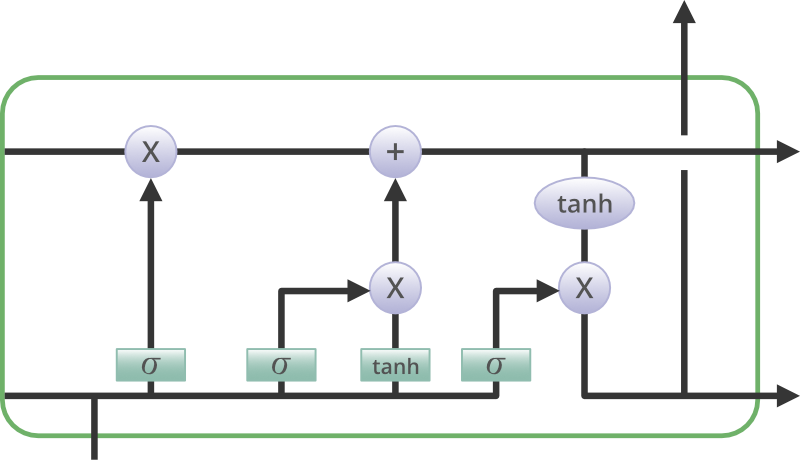



**Applications of LSTM Network**

- Language modeling and text generation (n-gram level, sentence level, or even paragraph level)
- Image processing
- Speech and handwriting recognition
- Music Generation
- Language translation (encoder-decoder LSTM model)

**Drawbacks of LSTM Networks**

- LSTMs could solve the vanishing gradient problem but not completely. Still need to move cell to cell for its evaluation. Cells become quite complex
- Huge time and resources are needed to solve real-world applications
- Developers seek models that retain information longer than LSTMs, inspired by how humans divide information for better memory
- LSTMs are sensitive to random weight initialization, often behaving like feed-forward networks, and are prone to overfitting
- Applying dropout, a regularization method, is challenging for LSTMs

In [9]:
#i) Importing libaries & data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [10]:
#ii) load data using pandas dataframe
df = pd.read_csv('monthly_milk_production.csv', index_col='Date', parse_dates=True)
df.index.freq = 'MS'
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


from matplotlib import pyplot as plt
_df_0['Production'].plot(kind='hist', bins=20, title='Production')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Production'].plot(kind='line', figsize=(8, 4), title='Production')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Date'>

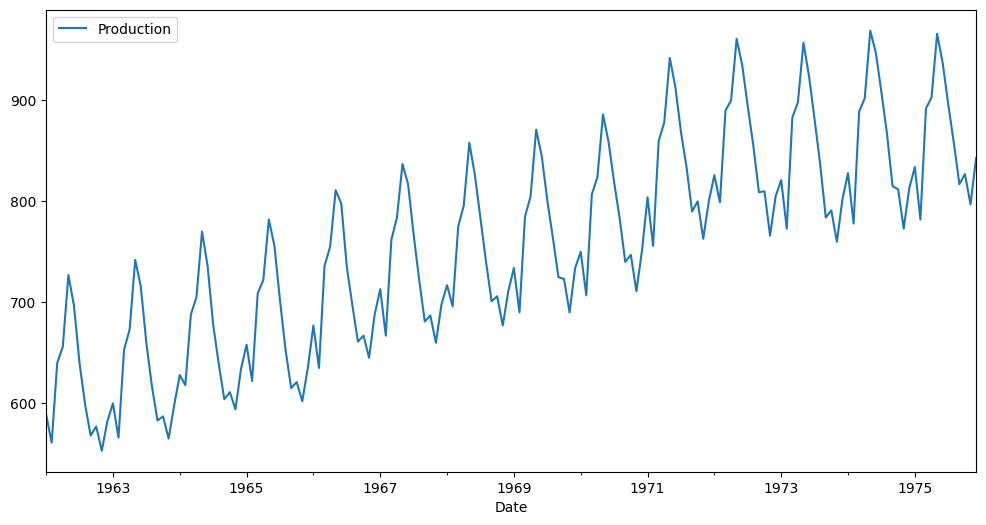

In [11]:
#iii) Perform EDA analysis on dataset

# Plotting graph b/w production and date
df.plot(figsize=(12, 6))


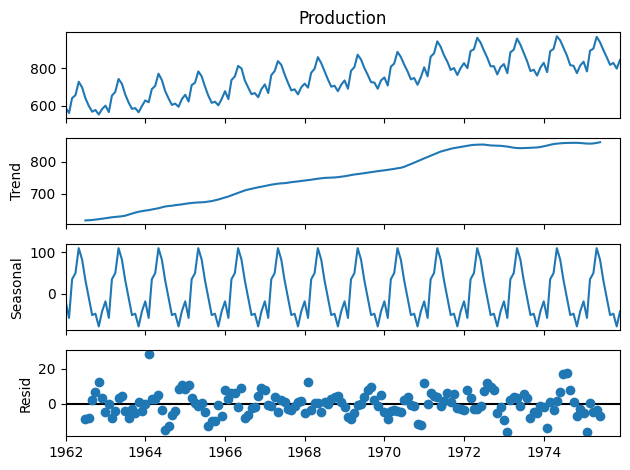

In [12]:
#iv) Seasonal Analysis of Time Series Data

from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['Production'])
results.plot()
plt.show()

In [16]:
#v) Splitting the data into training and testing
train = df.iloc[:156]
test = df.iloc[156:]

#vi) Scaling data to perform computations in a fast and accurate manner
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

#vii) Processing to a time series generation
from tensorflow.keras.utils import timeseries_dataset_from_array # Importing timeseries_dataset_from_array instead of TimeseriesGenerator

n_input = 3
n_features = 1
# Creating dataset using timeseries_dataset_from_array
dataset = timeseries_dataset_from_array(scaled_train, targets=scaled_train, sequence_length=n_input, batch_size=1)

# Iterating through the dataset to get X and y values
for batch in dataset.take(1):
    X, y = batch

print(f'Given the Array: \n{X.numpy().flatten()}') # Accessing the values using .numpy()
print(f'Predict this y: \n {y.numpy()}') # Accessing the values using .numpy()

#Same thing, for 12 months
n_input = 12
# Creating dataset using timeseries_dataset_from_array
dataset = timeseries_dataset_from_array(scaled_train, targets=scaled_train, sequence_length=n_input, batch_size=1)



Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.08653846]]


In [18]:
#viii) Define the architecture of the model using TensorFlow API
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()
# Replacing 'generator' with 'dataset' in model.fit
model.fit(dataset, epochs=5) # The dataset object is directly used for training

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0273
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0226
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0185
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0147
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098


Coiurtesy: https://medium.com/@udaytripurani04/stock-market-predictions-using-lstm-and-gru-models-with-python-ca103183dbc0

#**vi) Gated Recurrent Unit (GRU):**

A simple variant of RNN. GRU: Has two gates (reset and update gates) and combines the memory cell and hidden state, making it simpler and faster to train than LSTM.

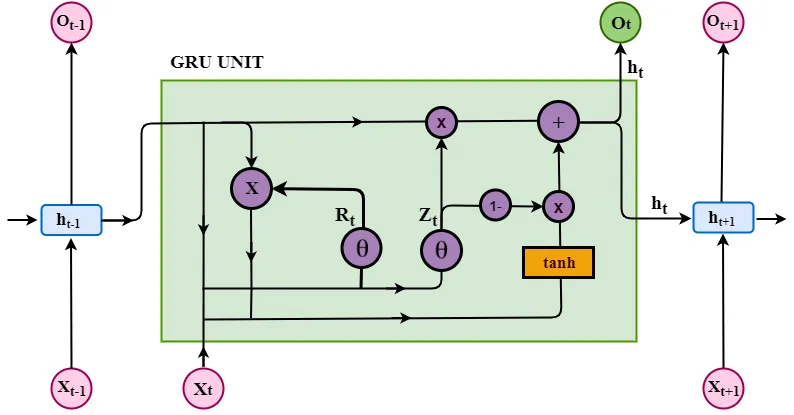





In [20]:
#i) Downloading dataset

import pandas as pd
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'IBM'

# Define the date range
start_date = '2000-01-01'
end_date = '2024-04-01'

# Download historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save data to CSV file
csv_filename = f'{ticker_symbol}_historical_data.csv'
data.to_csv(csv_filename)

print(f"Data downloaded and saved to '{csv_filename}'")

[*********************100%***********************]  1 of 1 completed

Data downloaded and saved to 'IBM_historical_data.csv'


In [24]:
#ii) Loading datset
data=pd.read_csv("/content/IBM_historical_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,107.492828,110.898659,106.955070,110.898659,59.361195,10823694
1,2000-01-04,108.986618,109.464630,105.999046,107.134323,57.346237,8606279
2,2000-01-05,107.970840,114.483749,107.194077,110.898659,59.361195,13318927
3,2000-01-06,112.810707,113.706978,108.508606,108.986618,58.337734,8338607
4,2000-01-07,112.093689,112.750954,105.760040,108.508606,58.081867,12402108


In [23]:
#iii) Normalize the data
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0,1))

# Select only the numerical features for scaling
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# Assuming these are your numerical columns

# Fit and transform the scaler on the numerical features only
data_normalized = scaler.fit_transform(data[numerical_features])

# Create a new DataFrame with the scaled numerical features and original 'Date' column
data_normalized = pd.DataFrame(data_normalized, columns=numerical_features, index=data.index)
data_normalized['Date'] = data['Date'] #Adding back the Date Column

# Reorder columns to have 'Date' as the first column (optional)
data_normalized = data_normalized[['Date'] + numerical_features]

data_normalized.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.359532,0.372487,0.361002,0.379083,0.185785,0.231962
1,2000-01-04,0.369253,0.363065,0.354763,0.354585,0.173612,0.179202
2,2000-01-05,0.362642,0.396043,0.362562,0.379083,0.185785,0.291333
3,2000-01-06,0.394139,0.390939,0.371140,0.366640,0.179602,0.172833
4,2000-01-07,0.389473,0.384658,0.353204,0.363529,0.178056,0.269519


In [27]:
#vi) Create sequence with a windows size of 15 and an output size of 1

import numpy as np

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size -1):  # Subtract 1 to avoid exceeding index
        X.append(data.iloc[i:(i + window_size)].values) #use iloc to access rows by integer index
        y.append(data.iloc[i + window_size].values) # use iloc to access rows by integer index
    return np.array(X), np.array(y)

window_size = 15
X, y = create_sequences(data_normalized, window_size)

X = X.reshape((X.shape[0], X.shape[1], X.shape[2])) # Reshape based on the number of features

In [33]:
# #v) Split the data into training and testing sets

# split = int(0.8* len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

# #v) Split the data into training and testing sets

# split = int(0.8* len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

#v) Split the data into training and testing sets
import numpy as np
split = int(0.8* len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# Exclude the 'Date' column when converting to float32
X_train = X_train[:,:,1:].astype(np.float32) # Select all rows, all columns starting from index 1
X_test = X_test[:,:,1:].astype(np.float32)  # Select all rows, all columns starting from index 1
y_train = y_train[:,1:].astype(np.float32) # Select all rows, all columns starting from index 1
y_test = y_test[:,1:].astype(np.float32)  # Select all rows, all columns starting from index 1


#Impute missing values if any. Otherwise comment it out
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
y_train = imputer.fit_transform(y_train)
y_test = imputer.transform(y_test)

In [34]:
#vi) Implementing a GRU (Gated Recurrent Unit) Model

from keras.layers import GRU, Dropout, SimpleRNN, Dense
from keras.models import Sequential
gru_model = Sequential()

#First GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))

# Second GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Third GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Fourth GRU layer with dropout
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))

#Output layer
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam',loss='mean_squared_error')

gru_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 15, 50)              │           8,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 15, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 15, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,651 (213.48 KB)

 Trainable params: 54,651 (213.48 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from re import VERBOSE
#vi) Training the model with 30 epochs and a batch size of 24
gru_model.fit(X_train, y_train, epochs=30, batch_size=24, verbose=1)

Epoch 1/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.0371
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0305
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - loss: 0.0296
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - loss: 0.0296
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0287
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0294
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0289
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0290
Epoch 9/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0288
Epoch 10/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - loss: 0.0291
Epoch 11/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0291
Epoch 12/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0289
Epoch 13/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - loss: 0.0285
Epoch 14/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0289
Epoch 15/30
203/203 ━━━━━━━━━━━━━━━

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


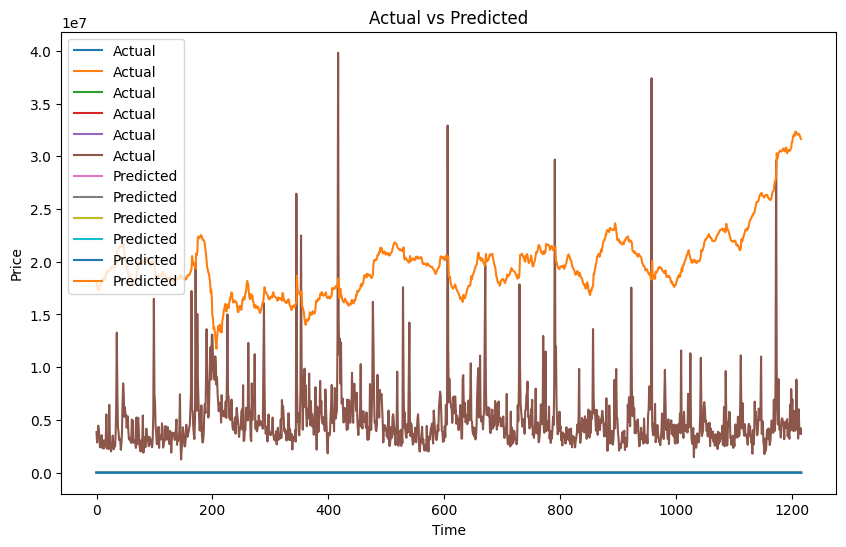

In [37]:
#Visualizing GRU model predictions: Computing Actual and Predicted Data

import matplotlib.pyplot as plt

# Make predictions
predicted_gru = gru_model.predict(X_test)

# Reshape predicted_gru to have the same number of features as the original data
predicted_gru = predicted_gru.reshape(-1, 1)  # Reshape to (num_samples, 1)
predicted_gru = np.repeat(predicted_gru, y_test.shape[1], axis=1) # Repeat to match number of features


# Inverse transform the predicted and actual values
predicted_gru = scaler.inverse_transform(predicted_gru)
y_test_actual = scaler.inverse_transform(y_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted_gru, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()